In [1]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame

## get attributes from file
20 features: *feature_*;

2 labels: *rain_Today* and *rain_Tomorrow*;


In [2]:
row_datase = pd.read_table('WeatherAustraliaLocation.csv',sep=',')
feature_ = row_datase.iloc[:,:-4]
feature_ = pd.concat([feature_,row_datase.iloc[:,-2:].head()],axis=1)
rain_Today = row_datase.iloc[:,-4:-3]
rain_Tomorrow = row_datase.iloc[:,-3:-2]
label = pd.concat([rain_Today,rain_Tomorrow],axis=1)
attributes = feature_.columns


E:\anaconda3.7\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: read_table is deprecated, use read_csv instead.
  """Entry point for launching an IPython kernel.


### get similarity between each two attributes

datasets without date by the method of correlation, corr()

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt


probe = feature_.iloc[:,1:-2]
#count similarity with corr()
correlations = feature_.corr()
#get absolute value of correlations
correction=abs(correlations)

#create a new pyplot
fig = plt.figure() 

#plot the correlation image
ax = sns.heatmap(correction,cmap=plt.cm.Oranges, linewidths=0.05,vmax=1, vmin=0 ,annot=True,annot_kws={'size':5})

#set title
ax.set_title('Characteristic correlation')
plt.savefig('cluster.jpg',dpi=300)
prob = feature_.iloc[:,1:-2]
plt.show()

<Figure size 640x480 with 2 Axes>

### check levels of the Location
levels of location:{'WaggaWagga':1, 'AliceSprings':2, 'Sydney':3, 'Melbourne':4, 'Darwin':5, 'Perth':6, 'Portland':7, 'Brisbane':8} 

======> to get levels of location:    set1 = set(feature_['Date'].isnull())



In [4]:
location = feature_['Location']
set1 = set(location)
locat = Series()
i = 0
while i < len(location):
    if (location[i] == 'WaggaWagga'):
         location[i] = 1
    if (location[i] == 'AliceSprings'):
         location[i] = 2
    if (location[i] == 'Sydney'):
         location[i] = 3
    if (location[i] == 'Melbourne'):
         location[i] = 4
    if (location[i] == 'Darwin'):
         location[i] = 5             
    if (location[i] == 'Perth'):
         location[i] = 6
    if (location[i] == 'Portland'):
         location[i] = 7
    if (location[i] == 'Brisbane'):
         location[i] = 8
    i = i + 1  
print(set1)
print(len(set1))

{1, 2, 3, 4, 5, 6, 7, 8}
8


### get 3-dimension-datasets by Isomap method 

features without date

In [5]:
from sklearn.manifold import Isomap
embedding = Isomap(n_components=3)
X_transformed = embedding.fit_transform(probe)
xx = DataFrame(X_transformed)
xx = pd.concat([xx,label],axis=1)
xx.to_csv('./result/Isomap_3D.csv',sep=',',encoding='utf-8')

### get 2-dimension-datasets by Isomap method 

features without date

In [6]:
from sklearn.manifold import Isomap
embedding = Isomap(n_components=2)
X_transformed = embedding.fit_transform(probe)
xx = DataFrame(X_transformed)
xx = pd.concat([xx,label],axis=1)
xx.to_csv('./result/Isomap_2D.csv',sep=',',encoding='utf-8')

E:\anaconda3.7\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: read_table is deprecated, use read_csv instead.
  """Entry point for launching an IPython kernel.


<Figure size 432x288 with 0 Axes>

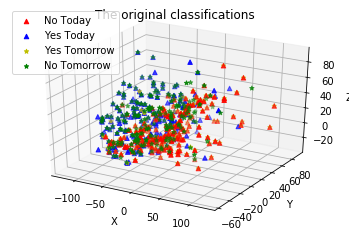

In [7]:
visiualization = pd.read_table('./result/Isomap_3D.csv',sep=',',encoding='utf-8')
# datasets who are not going to rain today
data1 = visiualization[visiualization.iloc[:,4]=='No'].iloc[:200,1:4]
# datasets who are going to rain today
data2 = visiualization[visiualization.iloc[:,4]=='Yes'].iloc[:200,1:4]
# datasets who are not going to rain tomorrow
data3 = visiualization[visiualization.iloc[:,5]=='No'].iloc[:200,1:4]
# datasets who are going to rain tomorrow
data4 = visiualization[visiualization.iloc[:,5]=='Yes'].iloc[:200,1:4]


from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
fig = plt.figure()

ax = plt.figure().add_subplot(111, projection = '3d')
#plot,that today it won't rain
ax.scatter(data1.iloc[:,0], data1.iloc[:,1], data1.iloc[:,2], c = 'r', label='No Today',marker = '^')
#plot, that today it will rain
ax.scatter(data2.iloc[:,0], data2.iloc[:,1], data2.iloc[:,2], c = 'b', label='Yes Today',marker = '^')
#plot, that tomorrow it won't rain
ax.scatter(data3.iloc[:,0], data3.iloc[:,1], data3.iloc[:,2], c = 'y', label='Yes Tomorrow', marker = '*')
#plot, that tomorrow it will rain
ax.scatter(data4.iloc[:,0], data4.iloc[:,1], data4.iloc[:,2], c = 'g', label='No Tomorrow', marker = '*')

ax.set_zlabel('Z') # 坐标轴
ax.set_ylabel('Y')
ax.set_xlabel('X')
ax.legend(loc='upper left')
plt.rcParams['figure.figsize'] = (10, 5) 
ax.set_title('The original classifications')
plt.show()


In [8]:
probe = probe.drop(['Temp9am','MinTemp','MaxTemp'],axis=1)

### seperate datas, whether it will rain today with original dataset

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# standerlize datasets
scaler = StandardScaler()
ratio = 0.6
scaler.fit(probe)
row_dataset_scaler = scaler.transform(probe)
X_train, X_test, y_train, y_test = train_test_split(probe, 
                                                        rain_Today, 
                                                        test_size=ratio, 
                                                        random_state=12)
print(len(X_train),len(y_train),len(X_test),len(y_test))

3903 3903 5856 5856


In [10]:
rain_t = pd.concat([X_train, y_train], axis = 1)
rain_t_ = pd.concat([X_test, y_test], axis = 1)
rain_t.to_csv('rainTodayTranDatasets.csv',sep = ',')
rain_t.to_csv('rainTodayTestDatasets.csv',sep = ',')

### seperate datas, whether it will rain today with Isomap dataset

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# standerlize datasets
ratio = 0.6
row_dataset_scaler = scaler.transform(probe)
X_, X_t, y_, y_t = train_test_split(xx.iloc[:,0:-2], 
                                                        xx.iloc[:,-2], 
                                                        test_size=ratio, 
                                                        random_state=12)
print(len(X_),len(y_),len(X_t),len(y_t))

3903 3903 5856 5856


### plot the 3-dimentionale test Datas before classification

by test data with only 3 features

ValueError: could not convert string to float: 'Yes'

<Figure size 720x360 with 0 Axes>

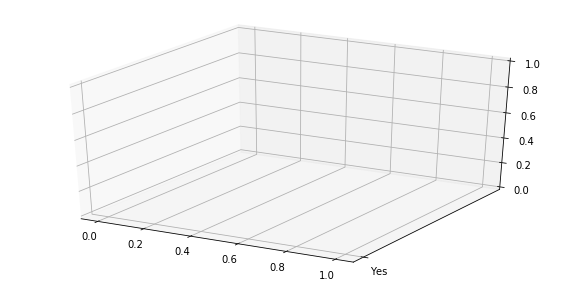

In [12]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

D_test = pd.concat([X_,y_], axis = 1)
a1 = D_test[D_test["RainToday"] =='Yes']
a2 = D_test[D_test["RainToday"] =='No']

fig = plt.figure()

ax = plt.figure().add_subplot(111, projection = '3d')
#plot,that today it won't rain
ax.scatter(a1.iloc[:200,0], a1.iloc[:200,2], a1.iloc[:200,1],label = "Rain today", c = 'r', marker = '^')
ax.scatter(a2.iloc[:200,0], a2.iloc[:200,2], a2.iloc[:200,1],label = "Do not", c = 'g', marker = '^')
ax.set_zlabel('Z') # 坐标轴
ax.set_ylabel('Y')
ax.set_xlabel('X')
ax.legend(loc="upper right")
plt.rcParams['figure.figsize'] = (10, 5) 
ax.set_title('Classifications of test data before prediction')
plt.show()

### Implementation of KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier
from sklearn.model_selection import cross_val_score
model1 = KNeighborsClassifier(n_neighbors=1)
model1.fit(X_train.iloc[:,0:-2],y_train)
score1 = model1.score(X_test.iloc[:,0:-2], y_test)

model2 = KNeighborsClassifier(n_neighbors=2)
model2.fit(X_train.iloc[:,0:-2],y_train)
score2 = model2.score(X_test.iloc[:,0:-2], y_test)

model3 = KNeighborsClassifier(n_neighbors=7)
model3.fit(X_train.iloc[:,0:-2],y_train)
score3 = model3.score(X_test.iloc[:,0:-2], y_test)

model4 = KNeighborsClassifier(n_neighbors=17)
model4.fit(X_train.iloc[:,0:-2],y_train)
score4 = model4.score(X_test.iloc[:,0:-2], y_test)


print("k = 1, score",score1, "\nk = 2, score",score2, "\nk = 7, score", score3, "\nk = 17, score", score4)
print("Althgou 15-KNN model performs the best,\nbut there's no big different between 4 models.")

### Predict with LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import roc_auc_score
clf = LogisticRegression(random_state=0).fit(X_train.iloc[:,0:-2], y_train)
# according to this model, rain today or not 
a = clf.predict(X_test.iloc[:,0:-2])
# according to this model, the ratio for raining today
b = pd.DataFrame(clf.predict_proba(X_test.iloc[:,0:-2]))
#Elivation of train and test results
print("accurate of train model:",clf.score(X_train.iloc[:,0:-2], y_train))
print("accurate of test model:",clf.score(X_test.iloc[:,0:-2], y_test))
print("auc of test model:",roc_auc_score(y_test, b.iloc[:,1]))
print("precision and recall of test model:\n",classification_report(y_true = y_test, y_pred = a))

### check the model

In [ ]:
clf

### with MinTemp, Rainfall and Sunshine visualize

### Visulization of LogisRegression results

In [ ]:
LRresult = pd.concat([X_test.iloc[:,0:-2], y_test],axis=1)
a1 = LRresult[LRresult["RainToday"] =='Yes']
a2 = LRresult[LRresult["RainToday"] =='No']

In [ ]:
fig = plt.figure()
ax = plt.figure().add_subplot(111, projection = '3d')
ax.scatter(a1.iloc[:200,8], a1.iloc[:200,3], a1.iloc[:200,5],label = "Rain today", c = 'r', marker = '^')
ax.scatter(a2.iloc[:200,8], a2.iloc[:200,3], a2.iloc[:200,5],label = "Do not", c = 'g', marker = '^')
ax.set_zlabel('Z') # 坐标轴
ax.set_ylabel('Y')
ax.set_xlabel('X')
ax.legend(loc="upper right")

plt.rcParams['figure.figsize'] = (10, 5) 
ax.set_title('Classifications of test data before prediction')
plt.show()

In [ ]:
LR = X_test
LR.fillna('999',inplace=True)
nullrows = LR[LR['Location']=='999'].index.tolist()
da = LR.drop(nullrows)
da2 = da.iloc[:,0:-2]
da2['RainToday'] = a
#da2 = pd.concat([da,pd.Series(a)], axis = 1)
#da2.rename(columns={ da2.columns[-1]: "RainToday" }, inplace=True)
b1 = da2[da2["RainToday"] =='Yes']
b2 = da2[da2["RainToday"] =='No']

In [ ]:
fig = plt.figure()
ax = plt.figure().add_subplot(111, projection = '3d')
ax.scatter(b1.iloc[:200,8], b1.iloc[:200,3], b1.iloc[:200,5],label = "Rain today", c = 'r', marker = '^')
ax.scatter(b2.iloc[:200,8], b2.iloc[:200,3], b2.iloc[:200,5],label = "Do not", c = 'g', marker = '^')
ax.set_zlabel('Z') # 坐标轴
ax.set_ylabel('Y')
ax.set_xlabel('X')
ax.legend(loc="upper right")
plt.rcParams['figure.figsize'] = (10, 5) 
ax.set_title('Classifications of test data after prediction')
plt.show()

### Multiplayer Perception,

In [ ]:
import datetime
print("Start time:",datetime.datetime.now().strftime('%H:%M:%S.%f'))
from sklearn.neural_network import MLPClassifier 
from sklearn.metrics import roc_auc_score
clf = MLPClassifier(hidden_layer_sizes=500,solver='adam', alpha=1e-5, random_state=1)
clf.fit(X_train.iloc[:,0:-2],y_train)
MLPR_test_pred = clf.predict(X_test.iloc[:,0:-2])
MLPR_test_score = clf.predict_proba(X_test.iloc[:,0:-2])
print("AUC:",roc_auc_score(y_test,pd.DataFrame(MLPR_test_score)[1]))
print(classification_report(y_true=y_test, y_pred=MLPR_test_pred) )
print("End time:",datetime.datetime.now().strftime('%H:%M:%S.%f'))